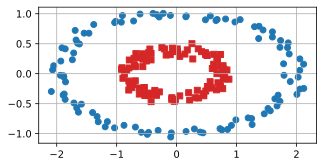

In [1]:
# https://learn.qiskit.org/course/machine-learning/quantum-feature-maps-kernels

import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pylab as pl
from sklearn.datasets import make_circles
from sklearn.svm import SVC
from mlxtend.plotting import plot_decision_regions

# Create circles dataset
X, Y = make_circles(n_samples=200, noise=0.05, factor=0.4)
# Distort the circles
x_scale = 2
X[:, 0] *= x_scale

# Separate smaller and larger circles
A = X[np.where(Y==0)]
B = X[np.where(Y==1)]

# Plot in 2D
fig = plt.figure(figsize=(5,5))
plt.axes().set_aspect('equal')
plt.scatter(A[:,0],A[:,1], marker='o')
plt.scatter(B[:,0],B[:,1], marker='s', c='C3')
plt.grid()
plt.show()

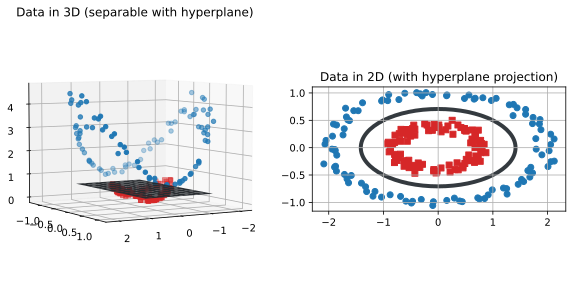

In [2]:
def transform_function(x, y):
    """ Implements f(x,y) = [x, y, z = x^2 + y^2] """
    return np.array([x, y, x**2.0 + y**2.0])

# Transform
A1 = np.array([transform_function(x, y) for
               x, y in zip(np.ravel(A[:,0]), np.ravel(A[:,1]))])
B1 = np.array([transform_function(x, y)
               for x, y in zip(np.ravel(B[:,0]), np.ravel(B[:,1]))])

# Plot in 3D
fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(121, projection='3d')
ax.set_title("Data in 3D (separable with hyperplane)")
ax.scatter(A1[:,0], A1[:,1], A1[:,2], marker='o')
ax.scatter(B1[:,0], B1[:,1], B1[:,2], marker='s', c='C3')  # make red
ax.view_init(5, 60)
x = np.arange(-1.25, 1.25, 0.25)
y = np.arange(-1.25, 1.25, 0.26)
X, Y = np.meshgrid(x, y)
Z = np.zeros(X.shape)
Z[:,:] = 0.5
ax.plot_surface(X, Y, Z, color='#343A3F')

# Project data to 2D
ax2d = fig.add_subplot(122)
ax2d.set_title("Data in 2D (with hyperplane projection)")
ax2d.set_aspect('equal')
ax2d.scatter(A1[:,0], A1[:,1], marker='o')
ax2d.scatter(B1[:,0], B1[:,1], marker='s',
            c='C3')  # make red
#ax2d.add_patch(pl.Circle((0,0), radius=np.sqrt(0.5),
#               fill=False, linestyle='solid', linewidth=4.0,
#               color='#343A3F'))
ax2d.add_patch(matplotlib.patches.Ellipse((0,0), width=2*np.sqrt(0.5)*x_scale, height=2*np.sqrt(0.5),
               fill=False, linestyle='solid', linewidth=4.0,
               color='#343A3F'))
plt.grid()
plt.show()

In [3]:
A_label = np.zeros(A.shape[0], dtype=int)
B_label = np.ones(B.shape[0], dtype=int)
X = np.concatenate([A, B])
y = np.concatenate([A_label, B_label])

## Polynomial kernel

after fitted: svm.gamma='scale' svm._gamma=0.6903405143858433, svm.coef0=0.0


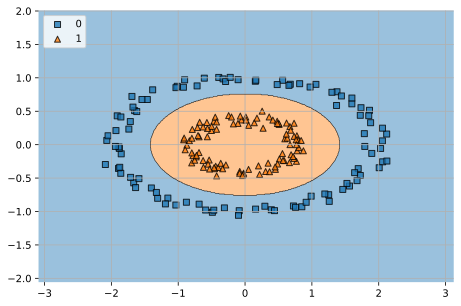

In [4]:
# https://github.com/scikit-learn/scikit-learn/blob/1.1.2/sklearn/svm/src/libsvm/svm.cpp#L342-L345
svm = SVC(kernel='poly', degree=2)
svm.fit(X, y)
# https://github.com/scikit-learn/scikit-learn/blob/1.1.2/sklearn/svm/_base.py#L219-L222
# X_var = X.var()
# _gamma = 1.0 / (X.shape[1] * X_var) if X_var != 0 else 1.0
print(f'after fitted: {svm.gamma=} {svm._gamma=}, {svm.coef0=}')

fig, ax = plt.subplots(1, 1, figsize=(10, 5))
fig = plot_decision_regions(X, y, clf=svm, ax=ax)
plt.legend(loc='upper left')
ax.set_aspect('equal')
plt.grid()
plt.show()

## RBF kernel

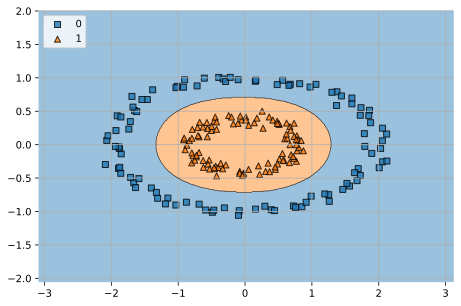

In [5]:
svm = SVC(kernel='rbf')
svm.fit(X, y)

fig, ax = plt.subplots(1, 1, figsize=(10, 5))
fig = plot_decision_regions(X, y, clf=svm, ax=ax)
plt.legend(loc='upper left')
ax.set_aspect('equal')
plt.grid()
plt.show()

## Precomputed kernel

In [6]:
def make_train_test_sets(test_ratio=.1):
    def split(arr, test_ratio):
        sep = int(arr.shape[0]*(1-test_ratio))
        return arr[:sep], arr[sep:]

    A_label = np.zeros(A.shape[0], dtype=int)
    B_label = np.ones(B.shape[0], dtype=int)
    A_train, A_test = split(A, test_ratio)
    B_train, B_test = split(B, test_ratio)
    A_train_label, A_test_label = split(A_label, test_ratio)
    B_train_label, B_test_label = split(B_label, test_ratio)
    X_train = np.concatenate([A_train, B_train])
    y_train = np.concatenate([A_train_label, B_train_label])
    X_test = np.concatenate([A_test, B_test])
    y_test = np.concatenate([A_test_label, B_test_label])
    return X_train, y_train, X_test, y_test

def make_sample_total():
    sample_total = np.zeros((100, int(100 * x_scale)), dtype=int)
    for i in range(sample_total.shape[0]):
        for j in range(sample_total.shape[1]):
            if (i-sample_total.shape[0]//2)**2 / (sample_total.shape[0]/4*(3/4))**2 + (j-sample_total.shape[1]//2)**2 / (sample_total.shape[0]/4*(3/4) * x_scale)**2 >= 2:
                sample_total[i, j] = 1
    return sample_total

train_data, train_labels, test_data, test_labels, sample_total = (
    *make_train_test_sets(.3), make_sample_total()
)
print(train_data.shape, train_labels.shape, test_data.shape, test_labels.shape, sample_total.shape)

(140, 2) (140,) (60, 2) (60,) (100, 200)


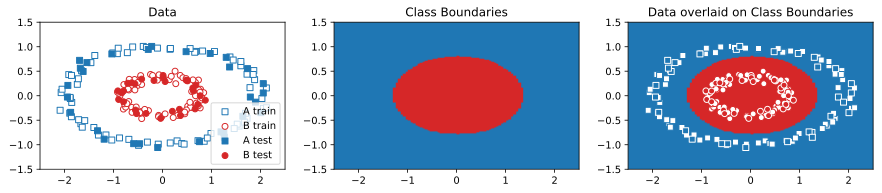

In [7]:
# Plot data and class boundaries
fig = plt.figure(figsize=(15, 5))
axdata = fig.add_subplot(131)
axdata.set_aspect('equal')
axdata.set_title("Data")
axdata.set_ylim(-1.5, 1.5)
axdata.set_xlim(-2.5, 2.5)
plt.scatter(train_data[np.where(train_labels[:] == 0), 0],
            train_data[np.where(train_labels[:] == 0), 1],
            marker='s', facecolors='w', edgecolors='C0',
            label="A train")
plt.scatter(train_data[np.where(train_labels[:] == 1), 0],
            train_data[np.where(train_labels[:] == 1), 1],
            marker='o', facecolors='w', edgecolors='C3',
            label="B train")
plt.scatter(test_data[np.where(test_labels[:] == 0), 0],
            test_data[np.where(test_labels[:] == 0), 1],
            marker='s', facecolors='C0', label="A test")
plt.scatter(test_data[np.where(test_labels[:] == 1), 0],
            test_data[np.where(test_labels[:] == 1), 1],
            marker='o', facecolors='C3', label="B test")
plt.legend()

from matplotlib.colors import ListedColormap
cmap = ListedColormap(["C3","w","C0"])
axmap = fig.add_subplot(132)
axmap.set_aspect('equal')
axmap.set_title("Class Boundaries")
axmap.set_ylim(-1.5, 1.5)
axmap.set_xlim(-2.5, 2.5)
axmap.imshow(np.asmatrix(sample_total).T,
             interpolation='nearest',
             origin='lower', cmap=cmap,
             extent=[-2.5, 2.5, -1.5, 1.5])

axboth = fig.add_subplot(133)
axboth.set_aspect('equal')
axboth.set_title("Data overlaid on Class Boundaries")
axboth.set_ylim(-1.5, 1.5)
axboth.set_xlim(-2.5, 2.5)
axboth.imshow(np.asmatrix(sample_total).T, interpolation='nearest',
              origin='lower', cmap=cmap,
              extent=[-2.5, 2.5, -1.5, 1.5])
axboth.scatter(train_data[np.where(train_labels[:] == 0), 0],
               train_data[np.where(train_labels[:] == 0), 1],
               marker='s', facecolors='w', edgecolors='C0', label="A")
axboth.scatter(train_data[np.where(train_labels[:] == 1), 0],
               train_data[np.where(train_labels[:] == 1), 1],
               marker='o', facecolors='w', edgecolors='C3', label="B")
axboth.scatter(test_data[np.where(test_labels[:] == 0), 0],
               test_data[np.where(test_labels[:] == 0), 1],
               marker='s', facecolors='C0', edgecolors='w',
               label="A test")
axboth.scatter(test_data[np.where(test_labels[:] == 1), 0],
               test_data[np.where(test_labels[:] == 1), 1],
               marker='o', facecolors='C3', edgecolors='w',
               label="B test")
plt.show()

In [8]:
def default_feature_map(x, y):
    return np.array([x, y, x**2 + y**2])

def calculate_kernel(x_data, y_data=None, feature_map=default_feature_map):
    if y_data is None:
        y_data = x_data
    x_matrix, y_matrix = [], []
    for x0, x1 in x_data:
        x_matrix.append(feature_map(x0, x1))
    for y0, y1 in y_data:
        y_matrix.append(feature_map(y0, y1))
    x_matrix, y_matrix = np.array(x_matrix), np.array(y_matrix)
    # Compute the square of the conjugate inner product of the feature
    # map circuits: the kernel matrix
    kernel = y_matrix.conjugate() @ x_matrix.transpose()
    return kernel

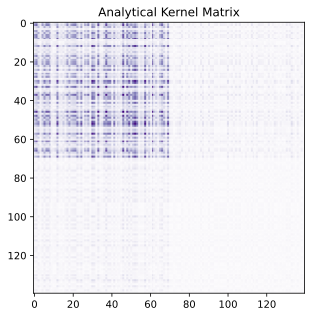

In [9]:
kernel = calculate_kernel(train_data)
plt.figure(figsize=(5, 5))
plt.imshow(np.asmatrix(kernel),interpolation='nearest', origin='upper', cmap='Purples')
plt.title("Analytical Kernel Matrix")
plt.show()

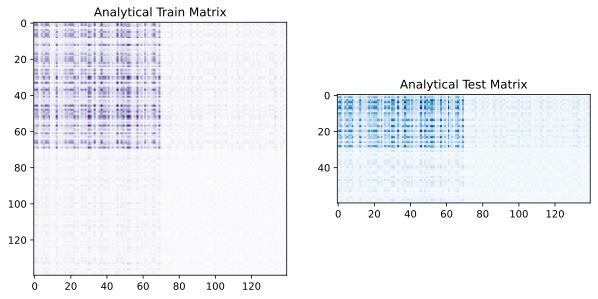

In [10]:
train_kernel = calculate_kernel(train_data)
test_kernel = calculate_kernel(train_data, test_data)
# plot analytical matrices
fig, axs = plt.subplots(1, 2, figsize=(10,5))
axs[0].imshow(np.asmatrix(train_kernel), interpolation='nearest',
              origin='upper', cmap='Purples')
axs[0].set_title("Analytical Train Matrix")
axs[1].imshow(np.asmatrix(test_kernel), interpolation='nearest',
              origin='upper', cmap='Blues')
axs[1].set_title("Analytical Test Matrix")
plt.show()

In [11]:
from sklearn.svm import SVC
# train scikit-learn svm model
model = SVC(kernel='precomputed')
model.fit(train_kernel, train_labels)
print("Number of support vectors for each class:", model.n_support_)
print("Indices of support vectors:", model.support_)

Number of support vectors for each class: [12 12]
Indices of support vectors: [  3   9  10  13  25  29  32  34  40  54  60  64  75  76  87  90 100 104
 106 112 113 115 130 133]


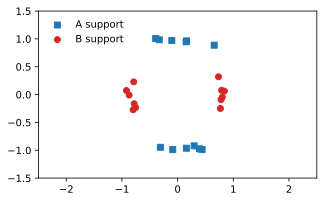

In [12]:
# Plot support vectors
plt.figure(figsize=(5, 5))
plt.axes().set_aspect('equal')
plt.ylim(-1.5, 1.5)
plt.xlim(-2.5, 2.5)
plt.scatter(train_data[model.support_[0:model.n_support_[0] ], 0],
            train_data[model.support_[0:model.n_support_[0] ], 1],
            marker='s', label="A support")
plt.scatter(train_data[model.support_[model.n_support_[0]:], 0],
            train_data[model.support_[model.n_support_[0]:], 1],
            marker='o', c='C3', label="B support")
plt.legend(loc='upper left', frameon=False)
plt.show()

In [13]:
pred = model.predict(test_kernel)

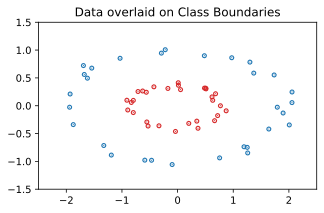

In [14]:
fig = plt.figure(figsize=(5, 5))
ax = fig.add_subplot(111)
ax.set_aspect('equal')
ax.set_title("Data overlaid on Class Boundaries")
ax.set_ylim(-1.5, 1.5)
ax.set_xlim(-2.5, 2.5)
#axboth.scatter(test_data[np.where(test_labels[:] == 0), 0],
#               test_data[np.where(test_labels[:] == 0), 1],
#               marker='s', facecolors='C0', edgecolors='w',
#               label="A test")
#axboth.scatter(test_data[np.where(test_labels[:] == 1), 0],
#               test_data[np.where(test_labels[:] == 1), 1],
#               marker='o', facecolors='C3', edgecolors='w',
#               label="B test")
for (x, y), pred_label in zip(test_data, pred):
    c = 'C0' if pred_label == 0 else 'C3'
    ax.add_patch(matplotlib.patches.Circle((x, y), radius=.01,
                 fill=True, linestyle='solid', linewidth=4.0,
                 color=c))
plt.show()

In [15]:
# test svm model
model.score(test_kernel, test_labels)

1.0